In [1]:
# 0 - layer_density
aerofoil_points = [
    (0.0, 0.0, 0.0),
    (1.0, 0.5, 0.0),
    (2.0, 0.5, 0.0),
    (3.0, 1.0, 0.0),
    (4.0, 1.0, 0.0),
    (5.0, 1.0, 0.0),
    (6.0, 1.0, 0.0),
    (7.0, 1.5, 0.0),
    (8.0, 1.5, 0.0),
    (9.0, 2.0, 0.0),
    (10.0, 2.0, 0.0),
    (11.0, 2.0, 0.0),
    (12.0, 1.5, 0.0),
    (13.0, 1.5, 0.0),
    (14.0, 1.5, 0.0),
    (15.0, 1.5, 0.0),
    (16.0, 1.0, 0.0),
    (17.0, 1.0, 0.0),
    (18.0, 0.5, 0.0),
    (19.0, 1.0, 0.0),
    (20.0, 1.0, 0.0),
    (21.0, 1.5, 0.0),
    (22.0, 2.0, 0.0),
    (22.0, 3.0, 0.0),
    (22.0, 4.0, 0.0),
    (22.0, 5.0, 0.0),
    (21.0, 5.5, 0.0),
    (20.0, 6.0, 0.0),
    (19.0, 6.5, 0.0),
    (18.0, 6.5, 0.0),
    (17.0, 6.5, 0.0),
    (16.0, 6.0, 0.0),
    (15.0, 6.0, 0.0),
    (14.0, 6.0, 0.0),
    (13.0, 5.5, 0.0),
    (12.0, 5.0, 0.0),
    (11.0, 5.0, 0.0),
    (10.0, 5.0, 0.0),
    (9.0, 4.5, 0.0),
    (8.0, 4.0, 0.0),
    (7.0, 4.0, 0.0),
    (6.0, 3.0, 0.0),
    (5.0, 3.0, 0.0),
    (4.0, 2.5, 0.0),
    (3.0, 2.0, 0.0),
    (2.0, 1.5, 0.0),
    (1.0, 1.0, 0.0)
]

scale_factor = 1.0 / 22.0

print([(a*scale_factor, b*scale_factor, c*scale_factor) for a, b, c in aerofoil_points])



[(0.0, 0.0, 0.0), (0.045454545454545456, 0.022727272727272728, 0.0), (0.09090909090909091, 0.022727272727272728, 0.0), (0.13636363636363635, 0.045454545454545456, 0.0), (0.18181818181818182, 0.045454545454545456, 0.0), (0.2272727272727273, 0.045454545454545456, 0.0), (0.2727272727272727, 0.045454545454545456, 0.0), (0.3181818181818182, 0.06818181818181818, 0.0), (0.36363636363636365, 0.06818181818181818, 0.0), (0.4090909090909091, 0.09090909090909091, 0.0), (0.4545454545454546, 0.09090909090909091, 0.0), (0.5, 0.09090909090909091, 0.0), (0.5454545454545454, 0.06818181818181818, 0.0), (0.5909090909090909, 0.06818181818181818, 0.0), (0.6363636363636364, 0.06818181818181818, 0.0), (0.6818181818181819, 0.06818181818181818, 0.0), (0.7272727272727273, 0.045454545454545456, 0.0), (0.7727272727272727, 0.045454545454545456, 0.0), (0.8181818181818182, 0.022727272727272728, 0.0), (0.8636363636363636, 0.045454545454545456, 0.0), (0.9090909090909092, 0.045454545454545456, 0.0), (0.9545454545454546,

In [2]:
aerofoil_points = [(0.0, 0.0, 0.0), (0.045454545454545456, 0.022727272727272728, 0.0), (0.09090909090909091, 0.022727272727272728, 0.0), (0.13636363636363635, 0.045454545454545456, 0.0), (0.18181818181818182, 0.045454545454545456, 0.0), (0.2272727272727273, 0.045454545454545456, 0.0), (0.2727272727272727, 0.045454545454545456, 0.0), (0.3181818181818182, 0.06818181818181818, 0.0), (0.36363636363636365, 0.06818181818181818, 0.0), (0.4090909090909091, 0.09090909090909091, 0.0), (0.4545454545454546, 0.09090909090909091, 0.0), (0.5, 0.09090909090909091, 0.0), (0.5454545454545454, 0.06818181818181818, 0.0), (0.5909090909090909, 0.06818181818181818, 0.0), (0.6363636363636364, 0.06818181818181818, 0.0), (0.6818181818181819, 0.06818181818181818, 0.0), (0.7272727272727273, 0.045454545454545456, 0.0), (0.7727272727272727, 0.045454545454545456, 0.0), (0.8181818181818182, 0.022727272727272728, 0.0), (0.8636363636363636, 0.045454545454545456, 0.0), (0.9090909090909092, 0.045454545454545456, 0.0), (0.9545454545454546, 0.06818181818181818, 0.0), (1.0, 0.09090909090909091, 0.0), (1.0, 0.13636363636363635, 0.0), (1.0, 0.18181818181818182, 0.0), (1.0, 0.2272727272727273, 0.0), (0.9545454545454546, 0.25, 0.0), (0.9090909090909092, 0.2727272727272727, 0.0), (0.8636363636363636, 0.29545454545454547, 0.0), (0.8181818181818182, 0.29545454545454547, 0.0), (0.7727272727272727, 0.29545454545454547, 0.0), (0.7272727272727273, 0.2727272727272727, 0.0), (0.6818181818181819, 0.2727272727272727, 0.0), (0.6363636363636364, 0.2727272727272727, 0.0), (0.5909090909090909, 0.25, 0.0), (0.5454545454545454, 0.2272727272727273, 0.0), (0.5, 0.2272727272727273, 0.0), (0.4545454545454546, 0.2272727272727273, 0.0), (0.4090909090909091, 0.20454545454545456, 0.0), (0.36363636363636365, 0.18181818181818182, 0.0), (0.3181818181818182, 0.18181818181818182, 0.0), (0.2727272727272727, 0.13636363636363635, 0.0), (0.2272727272727273, 0.13636363636363635, 0.0), (0.18181818181818182, 0.11363636363636365, 0.0), (0.13636363636363635, 0.09090909090909091, 0.0), (0.09090909090909091, 0.06818181818181818, 0.0), (0.045454545454545456, 0.045454545454545456, 0.0)]



In [3]:
import numpy as np

LAYER_SPACING = 0.5

points_per_layer = len(aerofoil_points)

depth = 15.0

for k in range(int(depth / LAYER_SPACING)):
    for i in range(points_per_layer):
        aerofoil_points.append((aerofoil_points[i][0], aerofoil_points[i][1], (k + 1) * LAYER_SPACING))

faces = []


i=0
while i + points_per_layer + 1 < len(aerofoil_points):
    faces.append([i, i + points_per_layer + 1, i + 1])
    faces.append([i, i + points_per_layer, i + points_per_layer + 1])
    i += 1

# Cap off the ends

# left face

left_edge = list(range(0, points_per_layer))

left_edge.reverse()

left_outer_point = (0.0, 0.0, -LAYER_SPACING)
right_outer_point = (0.0, 0.0, depth + LAYER_SPACING)



aerofoil_points.append(left_outer_point)  # i=-2
aerofoil_points.append(right_outer_point)  # i=-1

for i in range(points_per_layer):
    faces.append((i, i+1, len(aerofoil_points) - 2))
    faces.append((len(aerofoil_points) - 3 - i, len(aerofoil_points) - 4 - i, len(aerofoil_points) - 1))


In [4]:
print(faces)
len(aerofoil_points)

[[0, 48, 1], [0, 47, 48], [1, 49, 2], [1, 48, 49], [2, 50, 3], [2, 49, 50], [3, 51, 4], [3, 50, 51], [4, 52, 5], [4, 51, 52], [5, 53, 6], [5, 52, 53], [6, 54, 7], [6, 53, 54], [7, 55, 8], [7, 54, 55], [8, 56, 9], [8, 55, 56], [9, 57, 10], [9, 56, 57], [10, 58, 11], [10, 57, 58], [11, 59, 12], [11, 58, 59], [12, 60, 13], [12, 59, 60], [13, 61, 14], [13, 60, 61], [14, 62, 15], [14, 61, 62], [15, 63, 16], [15, 62, 63], [16, 64, 17], [16, 63, 64], [17, 65, 18], [17, 64, 65], [18, 66, 19], [18, 65, 66], [19, 67, 20], [19, 66, 67], [20, 68, 21], [20, 67, 68], [21, 69, 22], [21, 68, 69], [22, 70, 23], [22, 69, 70], [23, 71, 24], [23, 70, 71], [24, 72, 25], [24, 71, 72], [25, 73, 26], [25, 72, 73], [26, 74, 27], [26, 73, 74], [27, 75, 28], [27, 74, 75], [28, 76, 29], [28, 75, 76], [29, 77, 30], [29, 76, 77], [30, 78, 31], [30, 77, 78], [31, 79, 32], [31, 78, 79], [32, 80, 33], [32, 79, 80], [33, 81, 34], [33, 80, 81], [34, 82, 35], [34, 81, 82], [35, 83, 36], [35, 82, 83], [36, 84, 37], [36, 8

1459

""

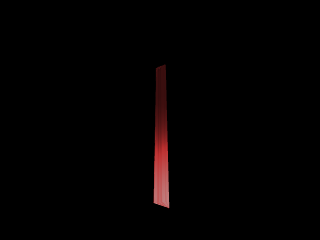

In [5]:
from glider.vehicle import Vehicle

vehicle = Vehicle(
    vertices=aerofoil_points,
    faces=faces,
    orientation=[90,180,-20]
)

vehicle.show()

In [6]:
from glider.optimization import drop_test_glider

world_xml = drop_test_glider(
    *vehicle.create_glider_from_vertices(),

    )

with open('world.xml', 'w') as f:
    f.write(world_xml)

In [7]:
from glider.optimization import iterate_population, fitness_func
from glider.visualize import view_vehicle
from glider.vehicle import Vehicle

frames = []


population = [
    Vehicle(
        vertices=aerofoil_points,
        faces=faces,
        orientation=[90,180,-20],
    ) for _ in range(100)] 

for i in range(300):
    population = iterate_population(
        population,
        survival_weight = 0.5,
        cloning_weight = 0.5,
    )

    if i % 10 == 0:
        print("Iteration:", i)
        winning_glider = population[0]
        print("Fitness:", fitness_func(winning_glider))
        # vehicle.Vehicle(vertices=winning_genes).show()
        frames.append(view_vehicle(*winning_glider.create_glider_from_vertices()))

Iteration: 0
Fitness: 30.316018680529616
Iteration: 10
Fitness: 30.316018680529616
Iteration: 20
Fitness: 30.316018680529616
Iteration: 30
Fitness: 30.316018680529616
Iteration: 40
Fitness: 30.316018680529616
Iteration: 50
Fitness: 30.316018680529616
Iteration: 60
Fitness: 30.316018680529616
Iteration: 70
Fitness: 30.316018680529616
Iteration: 80
Fitness: 30.316018680529616
Iteration: 90
Fitness: 30.316018680529616
Iteration: 100
Fitness: 30.316018680529616
Iteration: 110
Fitness: 30.316018680529616
Iteration: 120
Fitness: 30.316018680529616
Iteration: 130
Fitness: 30.316018680529616
Iteration: 140
Fitness: 30.316018680529616
Iteration: 150
Fitness: 30.316018680529616
Iteration: 160
Fitness: 30.316018680529616
Iteration: 170
Fitness: 30.316018680529616
Iteration: 180
Fitness: 30.316018680529616
Iteration: 190
Fitness: 30.316018680529616
Iteration: 200
Fitness: 30.316018680529616
Iteration: 210
Fitness: 30.316018680529616
Iteration: 220
Fitness: 30.316018680529616
Iteration: 230
Fitness

In [8]:
import mediapy as media

media.show_video(frames, fps=2)